Import libraries

In [73]:
import pandas as pd
import nltk

Read Dataset

In [74]:
df = pd.read_csv("new_sensor_data.csv")
df

,time_stamp,humidity,temperature,pressure,voc,pm2.5_alt,0.3_um_count,0.5_um_count,1.0_um_count,2.5_um_count,5.0_um_count,10.0_um_count
0,1716958200,35.6,103.80,974.548,75.488,40.6,40.6,8654.3520,2552.037,402.651,31.4750,5.909
1,1712625600,59.0,89.25,975.540,94.300,24.9,24.9,5019.9975,1470.028,267.220,25.4115,4.956
2,1712636400,44.4,100.20,973.482,88.790,38.6,38.6,7882.2940,2315.513,404.434,36.0690,7.345
3,1712214600,43.6,100.80,971.152,72.978,4.1,4.1,1050.6190,298.393,33.164,2.6890,1.183
4,1712213400,42.6,101.20,971.124,83.036,5.6,5.6,1372.1910,393.363,51.584,6.1850,2.503
...,...,...,...,...,...,...,...,...,...,...,...,...
8163,1712036400,47.0,99.20,973.096,78.478,14.7,14.7,3833.7900,1099.046,119.967,10.6870,1.699
8164,1715572200,41.0,99.20,975.216,91.612,36.9,36.9,7751.5240,2283.983,375.097,31.5310,7.110
8165,1714720200,43.2,99.20,972.562,71.178,6.2,6.2,1406.1590,406.721,63.414,8.2550,3.463
8166,1713070200,47.4,99.20,975.176,68.376,8.6,8.6,2317.2570,666.077,63.643,3.3830,1.361


Handling Missing Values

In [75]:
# check if there is any null values
df.isnull().sum()

time_stamp       0
humidity         0
temperature      0
pressure         0
voc              1
pm2.5_alt        0
0.3_um_count     0
0.5_um_count     0
1.0_um_count     0
2.5_um_count     0
5.0_um_count     0
10.0_um_count    0
dtype: int64

In [76]:
# drop rows that have null value
df = df.dropna()
df.isnull().sum()

time_stamp       0
humidity         0
temperature      0
pressure         0
voc              0
pm2.5_alt        0
0.3_um_count     0
0.5_um_count     0
1.0_um_count     0
2.5_um_count     0
5.0_um_count     0
10.0_um_count    0
dtype: int64

Preprocessing

In [77]:
# convert time_stamp into DateTime
df['time_stamp'] = pd.to_datetime(df['time_stamp'], unit='s')
df

/var/folders/qk/rt_g30ms5s3bymmrgcnhhcvr0000gn/T/ipykernel_1718/1267832007.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time_stamp'] = pd.to_datetime(df['time_stamp'], unit='s')


,time_stamp,humidity,temperature,pressure,voc,pm2.5_alt,0.3_um_count,0.5_um_count,1.0_um_count,2.5_um_count,5.0_um_count,10.0_um_count
0,2024-05-29 04:50:00,35.6,103.80,974.548,75.488,40.6,40.6,8654.3520,2552.037,402.651,31.4750,5.909
1,2024-04-09 01:20:00,59.0,89.25,975.540,94.300,24.9,24.9,5019.9975,1470.028,267.220,25.4115,4.956
2,2024-04-09 04:20:00,44.4,100.20,973.482,88.790,38.6,38.6,7882.2940,2315.513,404.434,36.0690,7.345
3,2024-04-04 07:10:00,43.6,100.80,971.152,72.978,4.1,4.1,1050.6190,298.393,33.164,2.6890,1.183
4,2024-04-04 06:50:00,42.6,101.20,971.124,83.036,5.6,5.6,1372.1910,393.363,51.584,6.1850,2.503
...,...,...,...,...,...,...,...,...,...,...,...,...
8163,2024-04-02 05:40:00,47.0,99.20,973.096,78.478,14.7,14.7,3833.7900,1099.046,119.967,10.6870,1.699
8164,2024-05-13 03:50:00,41.0,99.20,975.216,91.612,36.9,36.9,7751.5240,2283.983,375.097,31.5310,7.110
8165,2024-05-03 07:10:00,43.2,99.20,972.562,71.178,6.2,6.2,1406.1590,406.721,63.414,8.2550,3.463
8166,2024-04-14 04:50:00,47.4,99.20,975.176,68.376,8.6,8.6,2317.2570,666.077,63.643,3.3830,1.361


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8167 entries, 0 to 8167
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   time_stamp     8167 non-null   datetime64[ns]
 1   humidity       8167 non-null   float64       
 2   temperature    8167 non-null   float64       
 3   pressure       8167 non-null   float64       
 4   voc            8167 non-null   float64       
 5   pm2.5_alt      8167 non-null   float64       
 6   0.3_um_count   8167 non-null   float64       
 7   0.5_um_count   8167 non-null   float64       
 8   1.0_um_count   8167 non-null   float64       
 9   2.5_um_count   8167 non-null   float64       
 10  5.0_um_count   8167 non-null   float64       
 11  10.0_um_count  8167 non-null   float64       
dtypes: datetime64[ns](1), float64(11)
memory usage: 829.5 KB


Normalization

In [79]:
# normalization = value - min/max
# jujur masih bingung yg mana aja yg di normalisasi

from sklearn.preprocessing import MinMaxScaler

features = df.iloc[:, 1:] # excluding time_stamp

scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(features)

df_normalized = pd.concat([df['time_stamp'], pd.DataFrame(normalized_features, columns=features.columns)], axis=1)
df_normalized

,time_stamp,humidity,temperature,pressure,voc,pm2.5_alt,0.3_um_count,0.5_um_count,1.0_um_count,2.5_um_count,5.0_um_count,10.0_um_count
0,2024-05-29 04:50:00,0.076190,0.915493,0.496824,0.057122,0.091780,0.091780,0.168635,0.140618,0.058024,0.019447,0.007838
1,2024-04-09 01:20:00,0.633333,0.403169,0.605476,0.099998,0.055114,0.055114,0.094561,0.078370,0.038072,0.015597,0.006467
2,2024-04-09 04:20:00,0.285714,0.788732,0.380066,0.087440,0.087109,0.087109,0.152899,0.127010,0.058287,0.022364,0.009905
3,2024-04-04 07:10:00,0.266667,0.809859,0.124863,0.051401,0.006539,0.006539,0.013659,0.010965,0.003589,0.001169,0.001038
4,2024-04-04 06:50:00,0.242857,0.823944,0.121796,0.074325,0.010042,0.010042,0.020213,0.016429,0.006303,0.003389,0.002937
...,...,...,...,...,...,...,...,...,...,...,...,...
8164,2024-05-13 03:50:00,0.257143,0.753521,0.279299,0.047298,0.011443,0.011443,0.020905,0.017197,0.008046,0.004703,0.004319
8165,2024-05-03 07:10:00,0.357143,0.753521,0.565608,0.040912,0.017048,0.017048,0.039475,0.032118,0.008080,0.001610,0.001294
8166,2024-04-14 04:50:00,0.133333,0.753521,0.412048,0.123784,0.047875,0.047875,0.079512,0.066196,0.035447,0.020604,0.013147
8167,2024-05-16 07:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
df_normalized = df_normalized.dropna()
df_normalized.isnull().sum()

time_stamp       0
humidity         0
temperature      0
pressure         0
voc              0
pm2.5_alt        0
0.3_um_count     0
0.5_um_count     0
1.0_um_count     0
2.5_um_count     0
5.0_um_count     0
10.0_um_count    0
dtype: int64

In [81]:
df_normalized['pm2.5_alt'] = df['pm2.5_alt']
df_normalized

/var/folders/qk/rt_g30ms5s3bymmrgcnhhcvr0000gn/T/ipykernel_1718/246375277.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normalized['pm2.5_alt'] = df['pm2.5_alt']


,time_stamp,humidity,temperature,pressure,voc,pm2.5_alt,0.3_um_count,0.5_um_count,1.0_um_count,2.5_um_count,5.0_um_count,10.0_um_count
0,2024-05-29 04:50:00,0.076190,0.915493,0.496824,0.057122,40.6,0.091780,0.168635,0.140618,0.058024,0.019447,0.007838
1,2024-04-09 01:20:00,0.633333,0.403169,0.605476,0.099998,24.9,0.055114,0.094561,0.078370,0.038072,0.015597,0.006467
2,2024-04-09 04:20:00,0.285714,0.788732,0.380066,0.087440,38.6,0.087109,0.152899,0.127010,0.058287,0.022364,0.009905
3,2024-04-04 07:10:00,0.266667,0.809859,0.124863,0.051401,4.1,0.006539,0.013659,0.010965,0.003589,0.001169,0.001038
4,2024-04-04 06:50:00,0.242857,0.823944,0.121796,0.074325,5.6,0.010042,0.020213,0.016429,0.006303,0.003389,0.002937
...,...,...,...,...,...,...,...,...,...,...,...,...
8162,2024-04-02 05:20:00,0.347619,0.753521,0.337788,0.063936,4.1,0.031294,0.070384,0.057027,0.016378,0.006247,0.001780
8163,2024-04-02 05:40:00,0.204762,0.753521,0.569989,0.093872,14.7,0.083139,0.150234,0.125197,0.053965,0.019483,0.009567
8164,2024-05-13 03:50:00,0.257143,0.753521,0.279299,0.047298,36.9,0.011443,0.020905,0.017197,0.008046,0.004703,0.004319
8165,2024-05-03 07:10:00,0.357143,0.753521,0.565608,0.040912,6.2,0.017048,0.039475,0.032118,0.008080,0.001610,0.001294


In [82]:
df_normalized.describe()

,time_stamp,humidity,temperature,pressure,voc,pm2.5_alt,0.3_um_count,0.5_um_count,1.0_um_count,2.5_um_count,5.0_um_count,10.0_um_count
count,8166,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000
mean,2024-04-29 07:48:15.958853888,0.610428,0.390084,0.545452,0.076716,30.404494,0.067974,0.116389,0.097756,0.047601,0.023016,0.014566
min,2024-03-30 07:10:00,0.000000,0.000000,0.000000,0.000000,1.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2024-04-13 11:22:30,0.429167,0.225352,0.432202,0.036552,12.100000,0.025222,0.048296,0.039694,0.015966,0.005810,0.003547
50%,2024-04-29 15:55:00,0.695238,0.309859,0.557503,0.065976,22.300000,0.049043,0.089546,0.074148,0.032494,0.013733,0.007251
75%,2024-05-14 20:17:30,0.771429,0.570423,0.666977,0.102465,38.600000,0.087109,0.152389,0.127007,0.059796,0.028461,0.015743
max,2024-05-29 07:00:00,1.000000,1.000000,1.000000,1.000000,429.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,NaN,0.218446,0.213934,0.167144,0.057274,28.851537,0.067376,0.099192,0.086594,0.054891,0.038341,0.032136


In [83]:
X = df_normalized.drop(columns=['pm2.5_alt','time_stamp'])
y = df_normalized['pm2.5_alt']

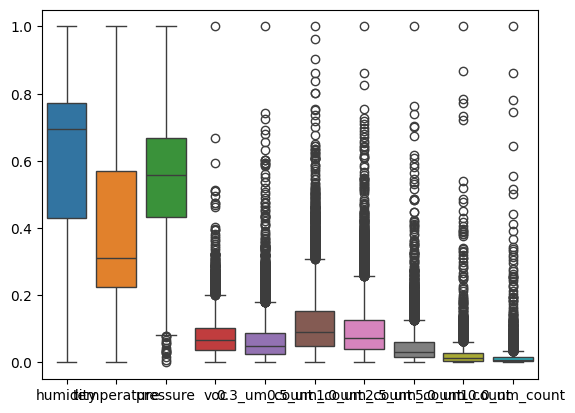

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data=X)
plt.show()

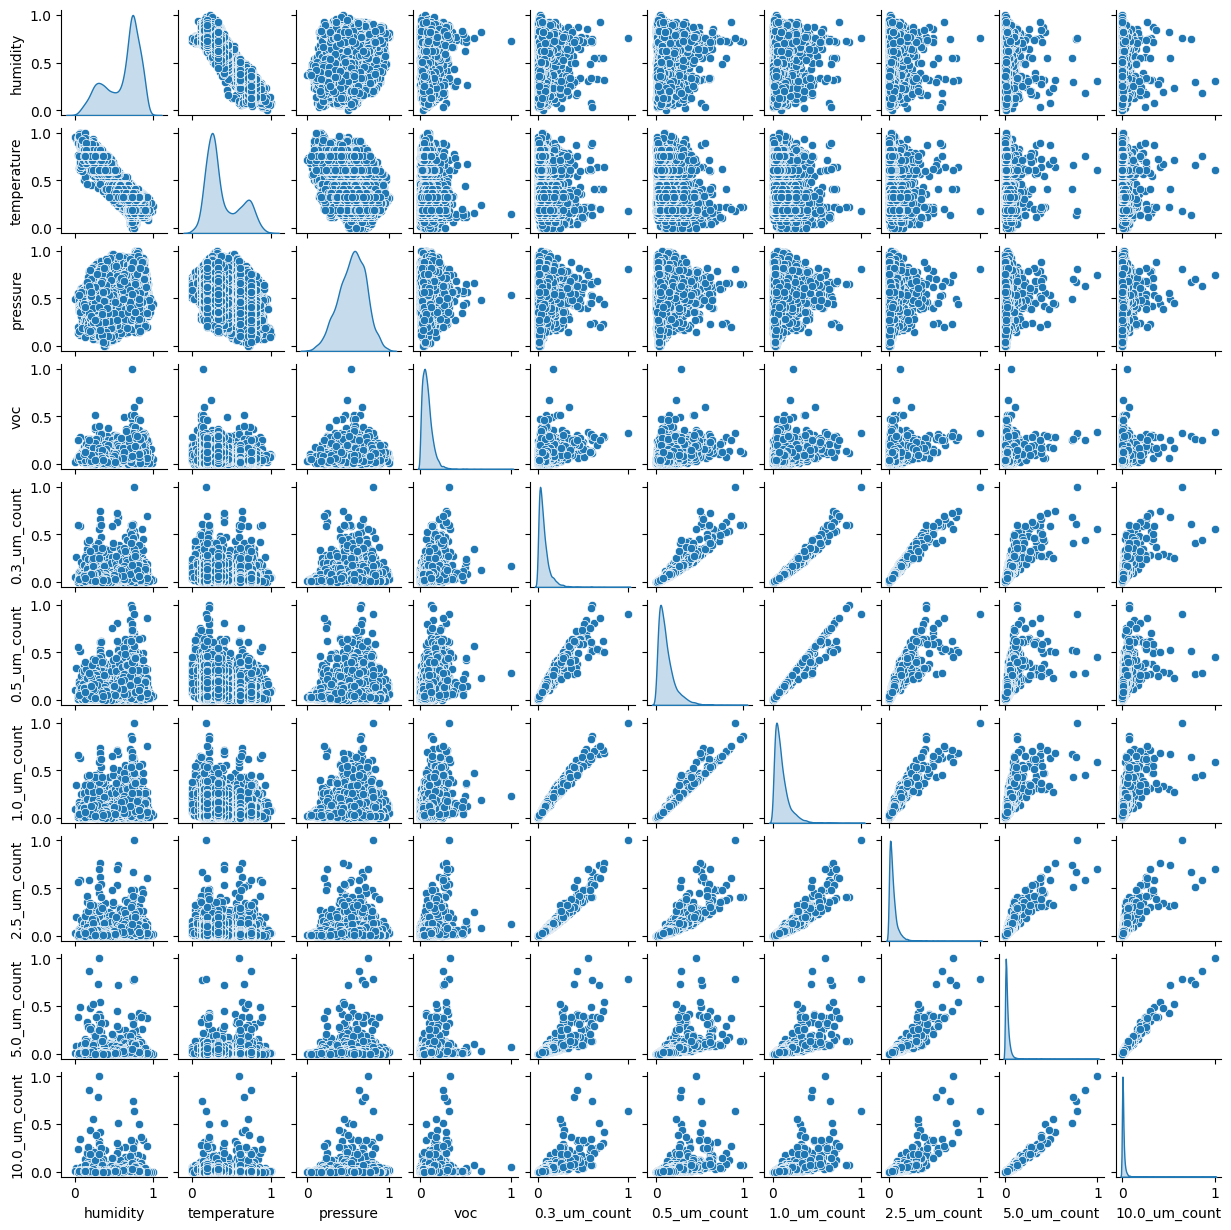

In [85]:
sns.pairplot(X, diag_kind='kde', height=1.25)
plt.show()

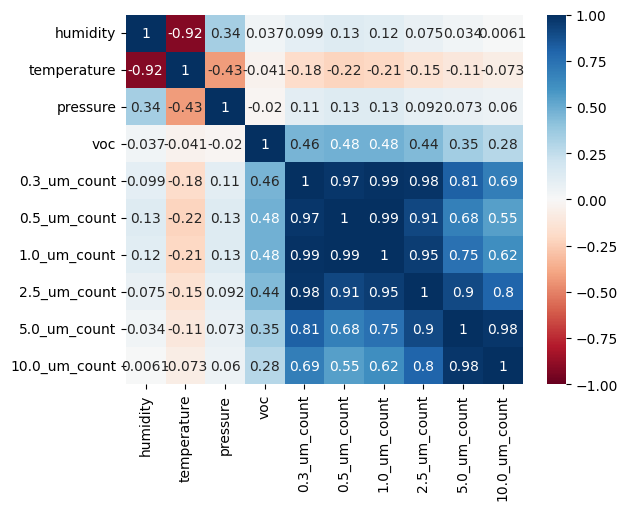

In [86]:
# plt.subplot(figsize=(7.5))
sns.heatmap(X.corr(), vmin=-1, vmax=1, cmap="RdBu", annot=True)
plt.show()

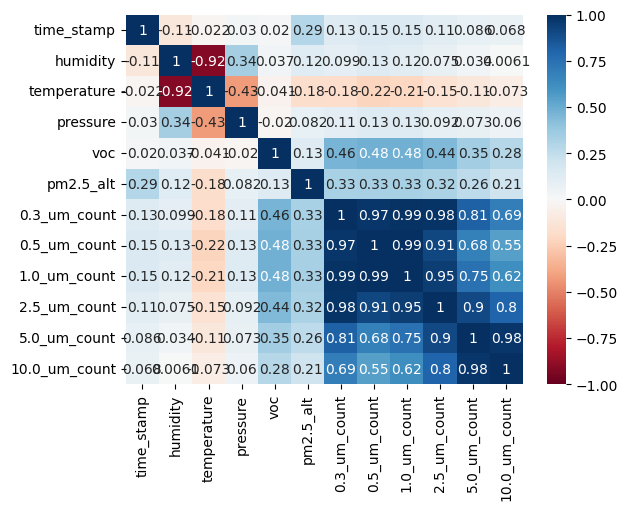

In [87]:
sns.heatmap(df_normalized.corr(), vmin=-1, vmax=1, cmap="RdBu", annot=True)
plt.show()

In [88]:
from sklearn.model_selection import train_test_split
# X = X.drop(columns=['temperature', 'voc', 'humidity','',''])

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.20, random_state=0)

In [92]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print("Intercept: {:0.4f}".format (regressor.intercept_))
print("Coefficient bl: {:0.4f}". format(regressor.coef_[0]))
print("Coefficient b2: {:0.4f}".format(regressor.coef_[1]))
print("Coefficient b3: {:0.4f}".format(regressor.coef_[2]))
print("Coefficient b4: {:0.4f}",format(regressor.coef_[3]))
print("Coefficient b5: {:0.4f}".format(regressor.coef_[4]))
print("Coefficient b6: {:0.4f}".format(regressor.coef_[5]))
print("Coefficient b7: {:0.4f}". format(regressor.coef_[6]))
print("Coefficient b8: {:0.4f}". format(regressor.coef_[7]))
print("Coefficient b9: {:0.4f}". format(regressor.coef_[8]))
print("Coefficient b10: {:0.4f}". format(regressor.coef_[9]))

Intercept: 46.0529
Coefficient bl: -17.8298
Coefficient b2: -32.8025
Coefficient b3: -1.8308
Coefficient b4: {:0.4f} -18.304067715194414
Coefficient b5: -5157.4830
Coefficient b6: 506.2303
Coefficient b7: 1111.5734
Coefficient b8: 4497.9521
Coefficient b9: -559.0666
Coefficient b10: -532.1679


In [90]:
y_pred = regressor.predict(X_test)

In [91]:
from sklearn.metrics import mean_squared_error
import numpy as np
print('RMSE : {:.4f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

RMSE : 25.8129


0.5 - 2.5 count aja

In [94]:
X_selected = X[['0.5_um_count','1.0_um_count','2.5_um_count']]
y_selected = y


X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X_selected.values, y_selected.values, test_size=0.20, random_state=0)

In [95]:
from sklearn.linear_model import LinearRegression
regressor_selected = LinearRegression()
regressor_selected.fit(X_train_selected, y_train_selected)

LinearRegression()

In [99]:

print("Intercept: {:0.4f}".format (regressor.intercept_))
print("Coefficient bl: {:0.4f}". format(regressor.coef_[0]))
print("Coefficient b2: {:0.4f}".format(regressor.coef_[1]))
print("Coefficient b3: {:0.4f}".format(regressor.coef_[2]))

Intercept: 46.0529
Coefficient bl: -17.8298
Coefficient b2: -32.8025
Coefficient b3: -1.8308


In [96]:
y_pred_selected = regressor_selected.predict(X_test_selected)

In [97]:
from sklearn.metrics import mean_squared_error
import numpy as np
print('RMSE : {:.4f}'.format(np.sqrt(mean_squared_error(y_test_selected, y_pred_selected))))

RMSE : 26.2375


In [98]:
X_selected

,0.5_um_count,1.0_um_count,2.5_um_count
0,0.168635,0.140618,0.058024
1,0.094561,0.078370,0.038072
2,0.152899,0.127010,0.058287
3,0.013659,0.010965,0.003589
4,0.020213,0.016429,0.006303
...,...,...,...
8162,0.070384,0.057027,0.016378
8163,0.150234,0.125197,0.053965
8164,0.020905,0.017197,0.008046
8165,0.039475,0.032118,0.008080
